# Working 9 to 5: Themes Behind Antiwork Sentiments on Reddit

### Research Question
What factors influence Redditors decisions to reject traditional employment, what are the major themes in the subreddit r/Antiwork?

### Background
The past few years have changed the way that we work, caused shifts in workplace and what people expect their work could be, resulting in changing sentiments among workers. These sentiments were at the forefront during the pandemic as people quit jobs, large labor strikes were seen in different industries, and union activity and support was also seen to rise.[^1] The subreddit r/Antiwork will be explored and topic modeling is used to understand the major themes. 

### Data
Reddit is the social media platform that will be used for the study, leveraging an existing dataset from Social Grep which includes two datasets (posts, comments) made on r/Antiwork up to February 18, 2022. [^2]

### Conclusion
This project presents findings of the manual content analysis of antiwork subreddit posts and LDA topic modeling of antiwork comments. There were two topic models created which showed a difference in the output, such as highlighted new themes not found in the initial content analysis. The second model produced clearer themes in the topics produced, which could be because there was more text pre-processing. Future considerations should involve additional steps for pre-processing to enhance text refinement before inputting it into the LDA model.

The results show alignment with major themes initially found and confirms an overlap between the manual content analysis and computational topic modeling. Additionally, there are new themes found in both topic models produced which provides additional avenues of exploration in the antiwork world. Overall these results show there are many diverse reasons why people reject traditional work and want to end work. These reasons include toxic workplaces, overworking, managerial or company misconduct, collective action for improved work conditions, termination, compensation, class, issues around healthcare, housing, and labor.

### References
[^1]: Goldberg, E. (2023, October). On the Future of Work, a Reporter Looks Back. *New York Times*. https://www.nytimes.com/2023/10/08/insider/future-of-work-reporter.html?smid=url-share <br/>
[^2]: Social Grep (2022, March). The /r/Antiwork Subreddit Dataset. *Social Grep*. https://socialgrep.com/datasets/the-antiwork-subreddit-dataset?utm_source=dataworld&utm_medium=link&utm_campaign=theantiworksubredditdataset

*I am referencing several resources, and am mainly relying on the following:
Mattingly, William. Introduction to Topic Modeling and Text Classification, 2021. https://topic-modeling.pythonhumanities.com/intro.html#

### Notebook Structure
This notebook walks through the entire project and has information on the posts and the comments, each major section has a divider and has a bigger header for the title.
1. Initial Data Exploration: Posts
2. Second Data Exploration: Posts
3. Initial Data Exploration: Comments 
4. Finalizing the Complete Comment Dataset
5. Cleaning Comment Dataset
6. Term Frequency - Inverse Document Frequency (TF-IDF) on Comment Dataset
7. KMeans Clustering on Comment Dataset
8. Topic Modeling: LDA Model 1
9. Topic Modeling: Bigrams, Trigrams, TF-IDF (LDA Model 2)

<br/>

---
---

## 1. Initial Data Exploration: Posts
Starting off by importing the **post dataset** and seeing what data is available.

Columns that I'll keep:
- id
- created_utc	
- permalink
- url
- selftext
- title
- score

Redundant Columns: these aren't needed in this initial review because they don't provide any helpful info
- subreddit.name ➡️ `antiwork` is the only thing here
- subreddit.nsfw ➡️ `False` is the only thing here
- subreddit.id	➡️ `2y77d` is the only thing here
- type ➡️ `post` is the only thing here
- domain ➡️ not really something that appears to provide utility

In [17]:
# importing the raw posts dataset as df and reviewing the first few rows

import pandas as pd

df = pd.read_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 3/Data/antiwork-subreddit-dataset-posts.csv')

df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,svw6x3,2y77d,antiwork,False,1645228719,https://old.reddit.com/r/antiwork/comments/svw...,self.antiwork,NaN,I was hired at the **Neon Museum** as a tour g...,Neon Museum Las Vegas took away our tips,15
1,post,svw6jv,2y77d,antiwork,False,1645228687,https://old.reddit.com/r/antiwork/comments/svw...,i.redd.it,https://i.redd.it/vuoctaq0koi81.png,NaN,Working,1887
2,post,svw5e8,2y77d,antiwork,False,1645228588,https://old.reddit.com/r/antiwork/comments/svw...,self.antiwork,NaN,"So, I'm quite new to the jobs front then most ...",Kind of feel like screaming into the cyberspace,4
3,post,svw498,2y77d,antiwork,False,1645228495,https://old.reddit.com/r/antiwork/comments/svw...,i.redd.it,https://i.redd.it/1w1unxjfjoi81.png,NaN,"Democracy is a lie, especially in the modern w...",14060
4,post,svw3qt,2y77d,antiwork,False,1645228450,https://old.reddit.com/r/antiwork/comments/svw...,self.antiwork,NaN,My boss asked me today what I plan on doing wh...,Master's Degree - No Pay Raise but OT,63


Reviewing the column `domain` to see if it would be helpful for the project. Notes below:
- There are 5126 different types of domain
- There aren't really groups of domain that are being grouped together, so it's not really usable in clear way

In [ ]:
domain_list = (df['domain'].unique())
#print(len(df['domain'].unique()))      #`5126` items in the domain

#looping through the all the things in the domain column
#for item in domain_list:
#    print(item)

from collections import Counter

# Using Counter to count occurrences
counter = Counter(domain_list)

# Looping through the unique items and print the count
for domain, count in counter.items():
    print(f"{domain}: {count} occurrences")


The initial review has provided helpful information and eliminated columns that probably won't be useful for me in the project. Columns that I'll keep: id, created_utc	, permalink, url, selftext, title, score


In [ ]:
#print(df['score'].sort())
# looking at the top posts in the entire dataset to see what is going on with them, i.e. what are some of the major themes
# that will help out in the next steps of the project

top_100_scores = df['score'].nlargest(100)
top_100_rows = df.loc[top_100_scores.index]
print(top_100_rows)

In [6]:
top_100_rows.to_csv('/Users/ingridarreola/Downloads/top_100.csv')

After reviewing the most popular posts and reviewing the title and description of the posts, I analyzed to review what major themes were found, the picture below summarizes what those are.
- This is helpful to see what the major themes are for the most popular posts
- Once topic modeling is done it'll be interesting to see if those results line up with this view below, or maybe it's different

![009 - ILS Z639 - Paper 3 Post Themes.png](<attachment:009 - ILS Z639 - Paper 3 Post Themes.png>)
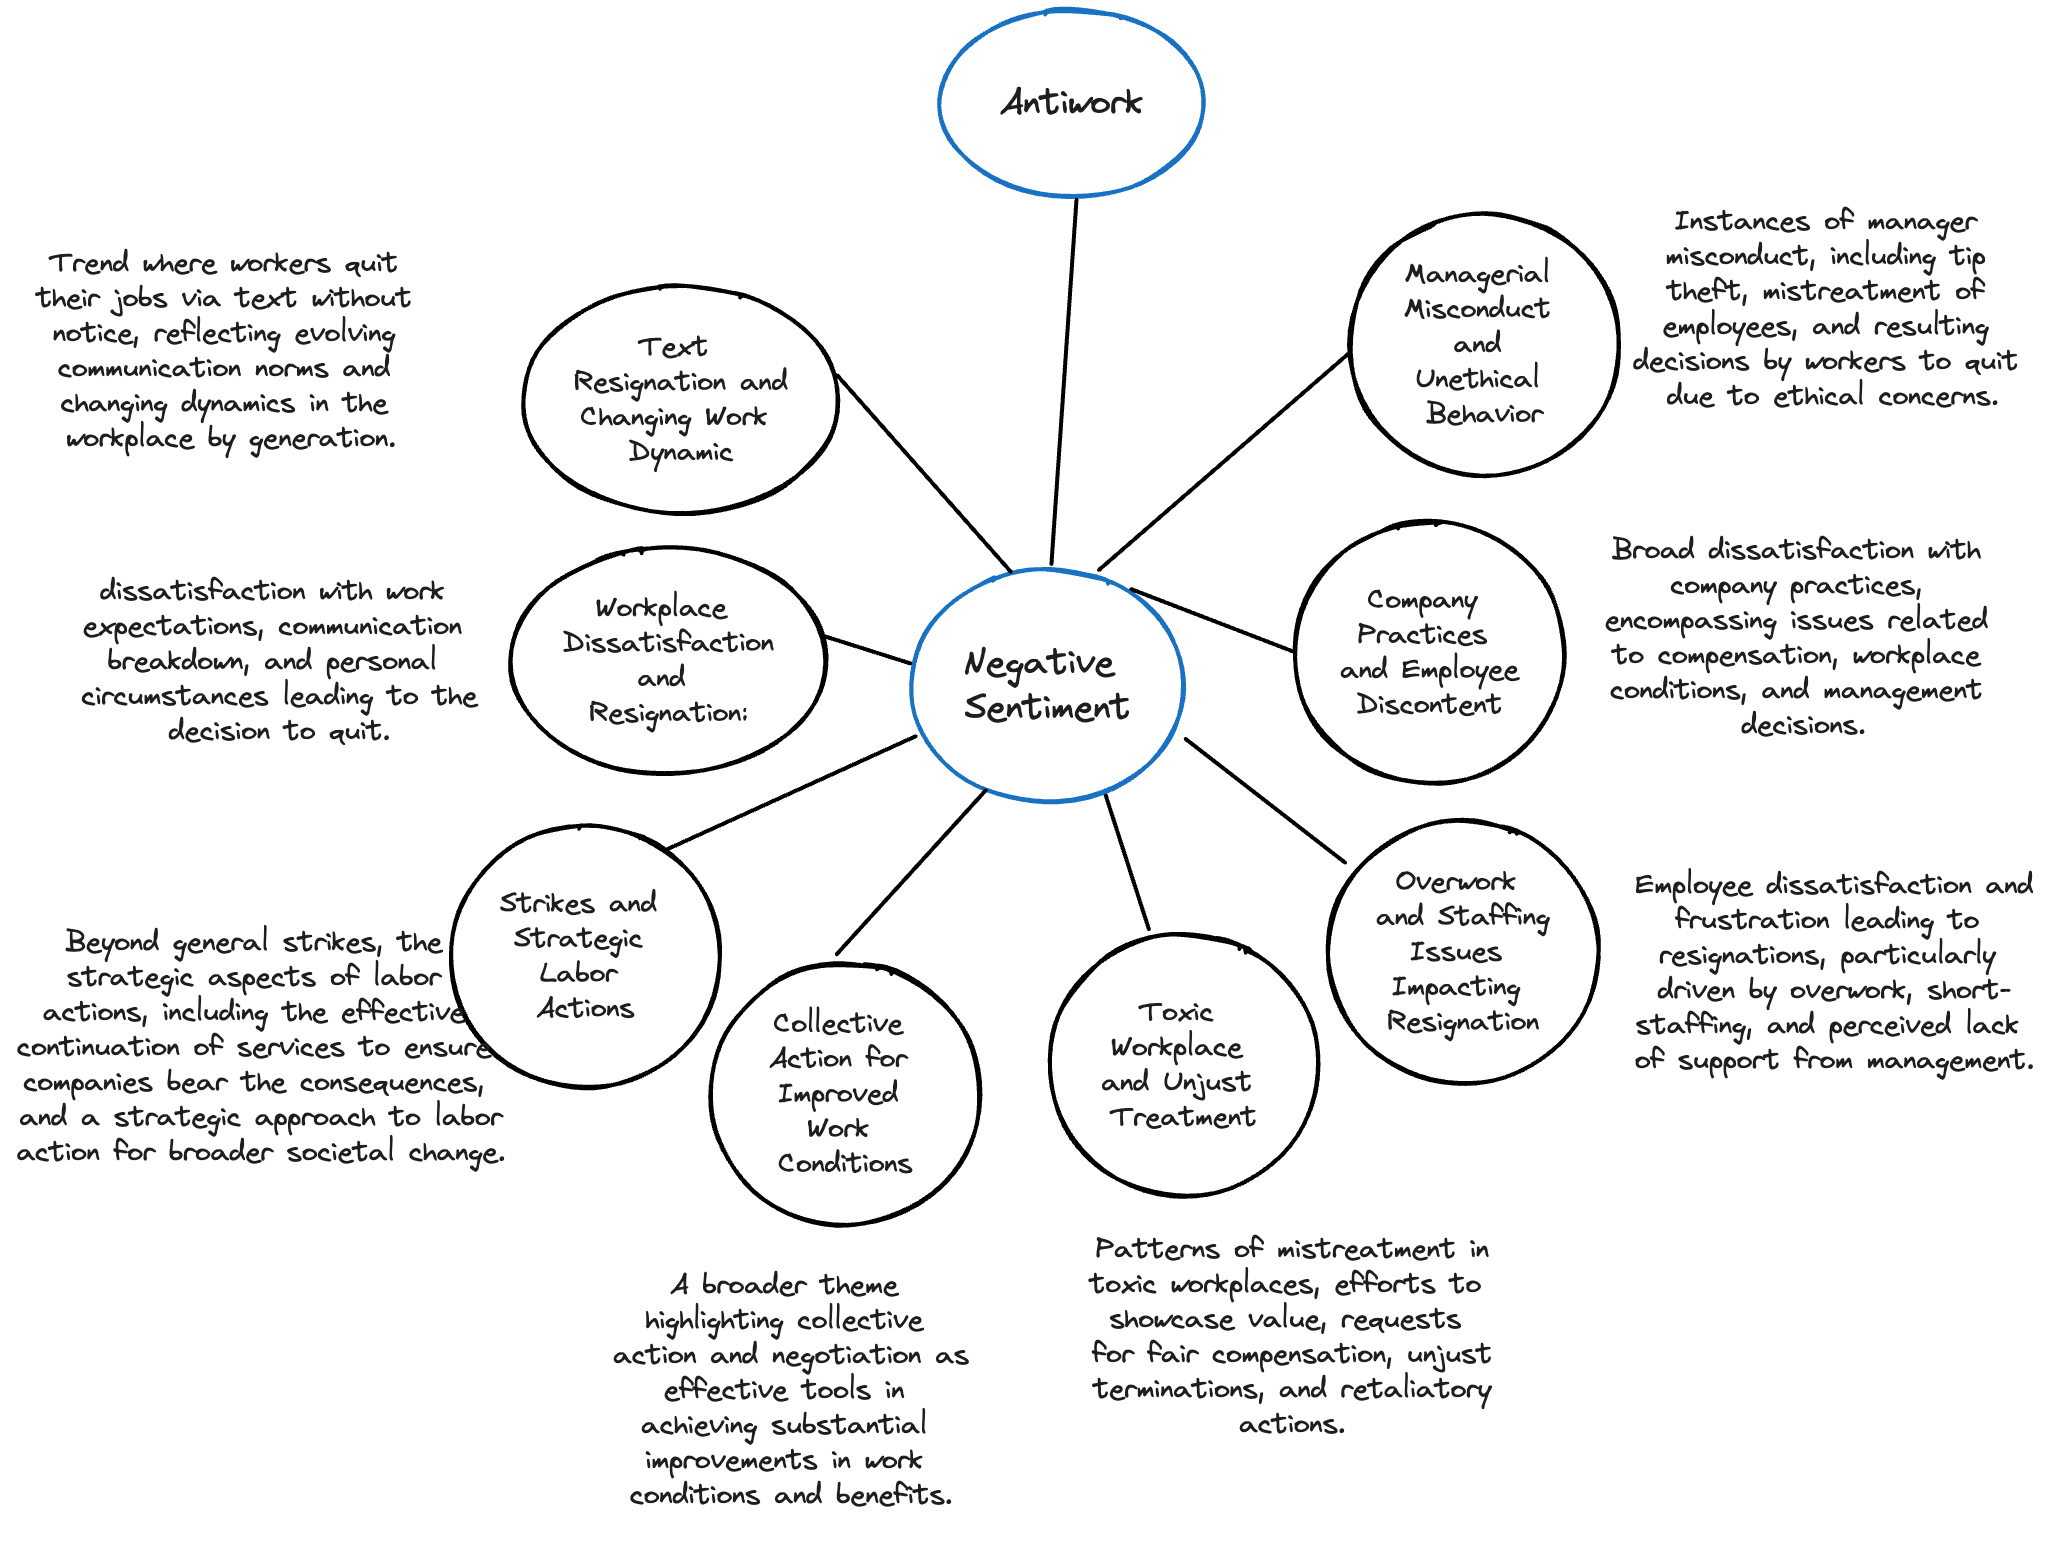

---
---

## 2. Second Data Exploration: Posts
After reviewing the top 55 most popular posts I have found keywords that I can use to search through the other posts, as these reflect major anti-work themes. The `keywords` list below is defined below.
- First I filter out any posts that are deleted
- Second I define the `keywords` which corresponds with the anti-work themes, these are combined to form a regex pattern, and a new column `keyword_match` is added to the dataframe so that it's easy to see how the posts align with the themes
- This keyword is used on the `selftext` and `title` columns, which lets me filter through the posts and find the ones that are associated with anti-work 
- I sort through the results, with the most popular at the top, and save these results in a csv `results_keyword_2`
- Next, I look through these posts to confirm that my filtering has done its job and that these indeed reflect anti-work themes present in the subreddit
- I look through these and search for new posts (i.e. not from the first post analysis above), I select a handful since I need to go through the comments next, and I note their IDs to aid in the comment exploration 

In [3]:
import pandas as pd
import re

# Filter out rows where "selftext" is "[deleted]"
df = df[df['selftext'] != '[deleted]']

# List of keywords
keywords = [
    "Medical Condition", "Work Environment", "Resignation", "Quit", "Sitting",
    "Work Shift", "Family Bereavement", "Resignation", "Quit",
    "Low Pay", "Minimum Wage", "Freelancing", "Toxic Workplace", "Unfair Termination", "Retaliation",
    "Turnover", "Raises", "Bonuses", "Executives", "Remote Work", "Training Budget",
    "Workplace Conditions", "Digital Surveillance", "Salary Reduction", "Labor Shortage",
    "Overwork", "Short-Staffed", "Employee Resignations", "Management Frustration",
    "Work-Life Balance", "Boomer Rant", "Weekends Off", "Family Issues", "Hiring Challenges", "Generation Gap",
    "Short-Staffed", "PTO Request", "Denied", "Expectations", "Conflict", "Quit", "Worker Shortage", "Resignation",
    "COVID Lockdown", "Economy Collapse", "Essential Workers", "Lowest Paid",
    "Unfair Compensation", "Legal Actions", "HR Involvement", "Resignation", "Mistreatment",
    "Fired", "Owner's Cut", "Pooling Tips",
    "Strike", "Refusing Fares", "Financial Impact", "Lost Revenue",
    "Manager", "Stealing Tips", "Quitting", "Mistreatment", "Verbal Degradation", "Minimum Wage", "Unethical Behavior", "Resignation",
    "Anti-Work", "Strike", "Union Members", "Contracts", "Raises", "Pensions", "COLA (Cost of Living Adjustment)",
    "Shift Coverage", "Day Off", "Short-Staffed", "Threats", "Resignation",
    "Strike", "Labor Action", "Societal Change", "Economic Impact", "Demands",
    "Labor Strike", "Strike", "Working Conditions", "Workers' Demands", "Working Class",
    "Strikers", "Firing", "Strike", "Job Applications", "System Crash",
    "Unionized", "Worker Rights", "Employment Change", "Transition", "Labor Union", "Job Shift",
    "Day Off", "Short-Staffed", "Negotiation", "Compensation", "Agreement",
    "Gender Pay Gap", "Salary", "Pay Transparency", "Equal Pay", "Salary Increase", "Workplace Fairness", "Negotiation",
    "Value of Labor", "Affordability", "Minimum Wage",
    "Remote Work", "Automation", "Job Redundancy", "Data Entry", "Work Efficiency", "Freelancing", "Severance",
    "Strike", "Union Contract", "Wage Increases", "Solidarity", "Labor Movement",
    "Boycott", "Wages", "Disparity", "Workers' Benefits", "Union", "Paid Family Leave",
    "Taxes", "Net Worth", "Tax Rates", "Wealth Disparity"
]

# Combine keywords into a regex pattern
pattern = '|'.join(keywords)

# Create a new column to capture the keyword match
df['keyword_match'] = ''

# Function to find the first matching keyword
def find_matching_keyword(text):
    for keyword in keywords:
        if pd.notna(text) and re.search(keyword, text, flags=re.IGNORECASE):
            return keyword
    return ''

# Apply the function to "selftext" and "title" columns
df['keyword_match'] = df.apply(lambda row: find_matching_keyword(row['selftext']) or find_matching_keyword(row['title']), axis=1)


result_df = df[df['keyword_match'] != '']

# Reset the index
result_df = result_df.reset_index(drop=True)

# Print the DataFrame, next will review deeper 
print(result_df)


       type      id subreddit.id subreddit.name  subreddit.nsfw  created_utc  \
0      post  svw5e8        2y77d       antiwork           False   1645228588   
1      post  svw28t        2y77d       antiwork           False   1645228327   
2      post  svw1zl        2y77d       antiwork           False   1645228305   
3      post  svw1vd        2y77d       antiwork           False   1645228296   
4      post  svw1mq        2y77d       antiwork           False   1645228278   
...     ...     ...          ...            ...             ...          ...   
64033  post  1vuz0u        2y77d       antiwork           False   1390408348   
64034  post  1rzud3        2y77d       antiwork           False   1386082618   
64035  post  1lysk4        2y77d       antiwork           False   1378639888   
64036  post  1l0eqv        2y77d       antiwork           False   1377365185   
64037  post  1kcgwh        2y77d       antiwork           False   1376486406   

                                       

In [5]:
# Assuming 'score' is the name of the column you want to sort by
result_df = result_df.sort_values(by='score', ascending=False)

# Reset the index
result_df = result_df.reset_index(drop=True)

# Print the resulting DataFrame
print(result_df)


       type      id subreddit.id subreddit.name  subreddit.nsfw  created_utc  \
0      post  q82vqk        2y77d       antiwork           False   1634227843   
1      post  r5tn55        2y77d       antiwork           False   1638296382   
2      post  spihun        2y77d       antiwork           False   1644531402   
3      post  rug5ib        2y77d       antiwork           False   1641148929   
4      post  s1deoh        2y77d       antiwork           False   1641909207   
...     ...     ...          ...            ...             ...          ...   
64033  post  r8g3oh        2y77d       antiwork           False   1638587336   
64034  post  r8fs52        2y77d       antiwork           False   1638586268   
64035  post  se6zce        2y77d       antiwork           False   1643313098   
64036  post  r8dstu        2y77d       antiwork           False   1638579893   
64037  post  qf1gjg        2y77d       antiwork           False   1635110285   

                                       

I have sorted through the results, with the most popular at the top, and save these results in a csv `results_keyword_2`. Next, I look through these posts to confirm that my filtering has done its job and that these indeed reflect anti-work themes present in the subreddit.
- I look through these and search for new posts (i.e. not from the first post analysis above), I select a handful since I need to go through the comments next, and I note their IDs to aid in the comment exploration 

In [13]:
result_df.to_csv('/Users/ingridarreola/Downloads/results_keyword_2.csv')

In [6]:
post_id = '''
s2igq9
qzgqnr
s0fgz7
qd59wp
pal2kg
r56369
qpqcon
qvlts5
s6y54e
qp0vdq
qr2gg1
qure86
s7xsfw
r6o5bl
rb4cvm
qfgkqn
rsyqf0
rt69qs
rqfh5r
rzbe4u
rvxfov
rcacru
qty4mt
qoamvy
rzp7eq
'''

In [8]:
# Split the lines and add single quotes to each line, then join them into a single list
quoted_lines = ["'" + line.strip() + "'" for line in post_id.strip().split('\n')]
result_list = '[' + ', '.join(quoted_lines) + ']'

# Print the resulting list
print(result_list)

['s2igq9', 'qzgqnr', 's0fgz7', 'qd59wp', 'pal2kg', 'r56369', 'qpqcon', 'qvlts5', 's6y54e', 'qp0vdq', 'qr2gg1', 'qure86', 's7xsfw', 'r6o5bl', 'rb4cvm', 'qfgkqn', 'rsyqf0', 'rt69qs', 'rqfh5r', 'rzbe4u', 'rvxfov', 'rcacru', 'qty4mt', 'qoamvy', 'rzp7eq']


In [12]:
result_list = ['s2igq9', 'qzgqnr', 's0fgz7', 'qd59wp', 'pal2kg', 'r56369', 'qpqcon', 'qvlts5', 's6y54e', 'qp0vdq', 'qr2gg1', 'qure86', 's7xsfw', 'r6o5bl', 'rb4cvm', 'qfgkqn', 'rsyqf0', 'rt69qs', 'rqfh5r', 'rzbe4u', 'rvxfov', 'rcacru', 'qty4mt', 'qoamvy', 'rzp7eq']

---
---

## 3. Initial Data Exploration: Comments

Starting off by importing the **comment dataset** and seeing what data is available. The comment dataset is huge. It's 2.8GB and significantly bigger than the posts. Since it is so large I am using Dask to import and do the data filtering required.

Notes on Data
- `comment_df` = the raw pull of the comment
- `body` is the column that has the comment text


Comment Cleaning
- I am leveraging my `keywords` since they contain anti-work themes and are a good way to filter on themes that are truly anti-work
- I am filtering anything that is 'deleted' as it's not useful
- I am looking for text with at least 30 words, as many of these comments that are short don't provide anything useful for analysis  
- Going through this was a trial and error, you'll see a lot of warning messages about rows that caused problems. I ended up deleting the rows that caused problems because it kept halting this whole process. This is taken out and I looked at the problem in `comment_df_filtered`
- The final comment cleaning was saved over into `comment_dd` as a pandas data frame
- The cleaned data frame is saved as a csv `comment_df_filtered_2` and this helped reduce the size significantly

In [50]:
# Bringing in the raw comment dataset

import pandas as pd 

comment_df = pd.read_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 3/Data/antiwork-subreddit-dataset-comments.csv')

print(comment_df)

            type       id subreddit.id subreddit.name  subreddit.nsfw  \
0        comment  hxikas5        2y77d       antiwork           False   
1        comment  hxikanz        2y77d       antiwork           False   
2        comment  hxikajx        2y77d       antiwork           False   
3        comment  hxikahd        2y77d       antiwork           False   
4        comment  hxika9i        2y77d       antiwork           False   
...          ...      ...          ...            ...             ...   
8095431  comment  cbqdr6r        2y77d       antiwork           False   
8095432  comment  cbp0x6n        2y77d       antiwork           False   
8095433  comment  cbohwid        2y77d       antiwork           False   
8095434  comment  cbnmzk2        2y77d       antiwork           False   
8095435  comment  cbnmycm        2y77d       antiwork           False   

         created_utc                                          permalink  \
0         1645228797  https://old.reddit.com/r/a

In [2]:
# After reviewing the dataset, there were error messages that kept popping up, just going to remove the rows so that I can get through the comment exploration without havng to run into the problems 

# Specify the indices of problematic rows
problematic_indices = [101098, 97784, 103582, 107470, 95354, 96413]

# Filter out the problematic rows
comment_df_filtered = comment_df[~comment_df.index.isin(problematic_indices)]

# Save the filtered DataFrame to a new CSV file
#comment_df_filtered.to_csv('/Users/ingridarreola/Downloads/comment_df_filtered.csv', index=False)

In [1]:
# bringing in Dask for the data filtering because the comment dataset is so large

import dask.dataframe as dd
import pandas as pd
import re

# Read the dataset with Dask
comment_dd = dd.read_csv('/Users/ingridarreola/Downloads/comment_df_filtered.csv')

# Bringing in as chunk sizes so that it's easy to identify where the errors are made, and so that they can be fixed
chunk_size = 95000

# List of keywords
keywords = [
    "Medical Condition", "Work Environment", "Resignation", "Quit", "Sitting",
    "Work Shift", "Family Bereavement", "Resignation", "Quit",
    "Low Pay", "Minimum Wage", "Freelancing", "Toxic Workplace", "Unfair Termination", "Retaliation",
    "Turnover", "Raises", "Bonuses", "Executives", "Remote Work", "Training Budget",
    "Workplace Conditions", "Digital Surveillance", "Salary Reduction", "Labor Shortage",
    "Overwork", "Short-Staffed", "Employee Resignations", "Management Frustration",
    "Work-Life Balance", "Boomer Rant", "Weekends Off", "Family Issues", "Hiring Challenges", "Generation Gap",
    "Short-Staffed", "PTO Request", "Denied", "Expectations", "Conflict", "Quit", "Worker Shortage", "Resignation",
    "COVID Lockdown", "Economy Collapse", "Essential Workers", "Lowest Paid",
    "Unfair Compensation", "Legal Actions", "HR Involvement", "Resignation", "Mistreatment",
    "Fired", "Owner's Cut", "Pooling Tips",
    "Strike", "Refusing Fares", "Financial Impact", "Lost Revenue",
    "Manager", "Stealing Tips", "Quitting", "Mistreatment", "Verbal Degradation", "Minimum Wage", "Unethical Behavior", "Resignation",
    "Anti-Work", "Strike", "Union Members", "Contracts", "Raises", "Pensions", "COLA (Cost of Living Adjustment)",
    "Shift Coverage", "Day Off", "Short-Staffed", "Threats", "Resignation",
    "Strike", "Labor Action", "Societal Change", "Economic Impact", "Demands",
    "Labor Strike", "Strike", "Working Conditions", "Workers' Demands", "Working Class",
    "Strikers", "Firing", "Strike", "Job Applications", "System Crash",
    "Unionized", "Worker Rights", "Employment Change", "Transition", "Labor Union", "Job Shift",
    "Day Off", "Short-Staffed", "Negotiation", "Compensation", "Agreement",
    "Gender Pay Gap", "Salary", "Pay Transparency", "Equal Pay", "Salary Increase", "Workplace Fairness", "Negotiation",
    "Value of Labor", "Affordability", "Minimum Wage",
    "Remote Work", "Automation", "Job Redundancy", "Data Entry", "Work Efficiency", "Freelancing", "Severance",
    "Strike", "Union Contract", "Wage Increases", "Solidarity", "Labor Movement",
    "Boycott", "Wages", "Disparity", "Workers' Benefits", "Union", "Paid Family Leave",
    "Taxes", "Net Worth", "Tax Rates", "Wealth Disparity"
]

# Initialize an empty list to store processed chunks
chunks = []

# Iterate over chunks of the Dask DataFrame
for chunk in comment_dd.to_delayed():
    try:
        # Convert the chunk to a Dask DataFrame
        chunk_df = dd.from_delayed([chunk])

        # Exclude problematic rows using loc
        #chunk_df = chunk_df.loc[~chunk_df.index.isin(problematic_indices)]

        # Filter out rows where "body" is "[deleted]"
        chunk_df = chunk_df[chunk_df['body'] != '[deleted]']


        # Create a new column to capture the keyword match
        chunk_df['keyword_match'] = ''

        # Function to find the first matching keyword
        def find_matching_keyword(text):
            for keyword in keywords:
                if pd.notna(text) and re.search(keyword, text, flags=re.IGNORECASE):
                    return keyword
            return ''

        # Apply the function to "body" column
        chunk_df['keyword_match'] = chunk_df['body'].apply(lambda text: find_matching_keyword(text), meta=('x', 'str'))

        # Filter based on the regex search
        chunk_df = chunk_df[chunk_df['keyword_match'] != '']

        # Count the number of words in the 'body' column
        chunk_df['word_count'] = chunk_df['body'].str.split().apply(len, meta=('x', 'int'))

        # Filter based on the minimum word count (e.g., 30)
        chunk_df = chunk_df[chunk_df['word_count'] >= 30]

        # Append the processed chunk to the list
        chunks.append(chunk_df)
    except Exception as e:
        print(f"Error processing chunk: {e}")
        print(chunk)  # Print the problematic chunk

# Concatenate the processed chunks to get the final result
comment_dd = dd.concat(chunks)

# Compute the result to get a Pandas DataFrame, which can be used for the rest of hte comment filtering
comment_dd = comment_dd.compute()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 0))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 95567
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 2))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | object  | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

The following columns also raised exceptions on conversion:

- created_utc
  ValueError('cannot convert float NaN to integer')

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'object',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 3))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 101109
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 6))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 97786
Delayed(('read-csv-bea6790bd8bf58a46a2566

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 8))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 10))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 14))
Error processing chunk: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 20))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 21))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 92587
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 23))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 24))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 95074
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 27))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 28))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 98398
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 31))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 32))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 98642
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 33))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 34))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 36))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 97812
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 37))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 100837
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 38))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 39))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 40))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 96729
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 42))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 94064
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 43))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 44))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 91634
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 45))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 98272
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 46))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | object  | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

The following columns also raised exceptions on conversion:

- created_utc
  ValueError('cannot convert float NaN to integer')

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'object',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 47))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 95745
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 48))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 49))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 51))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 97438
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 52))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 94990
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 53))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 54))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 56))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 59))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 60))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 99854
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 62))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 63))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 97846
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 65))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 98192
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 66))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 67))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 97382
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 68))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 69))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 96143
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 70))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 71))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 96712
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 74))
Error processing chunk: Error tokenizing data. C error: EOF inside string starting at row 96615
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 75))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 76))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Error processing chunk: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-------------+---------+----------+
| Column      | Found   | Expected |
+-------------+---------+----------+
| created_utc | float64 | int64    |
| score       | float64 | int64    |
+-------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'created_utc': 'float64',
       'score': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.
Delayed(('read-csv-bea6790bd8bf58a46a256696559b0f43', 83))


In [42]:
# saving the first pass of filtering as `comment_df_filtered_2`
comment_dd.to_csv('/Users/ingridarreola/Downloads/comment_df_filtered_2.csv', index=False)

In [2]:
comment_dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303247 entries, 15 to 94314
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            303247 non-null  object 
 1   id              303247 non-null  object 
 2   subreddit.id    303247 non-null  object 
 3   subreddit.name  303247 non-null  object 
 4   subreddit.nsfw  303247 non-null  bool   
 5   created_utc     303247 non-null  int64  
 6   permalink       303247 non-null  object 
 7   body            303247 non-null  object 
 8   sentiment       303238 non-null  float64
 9   score           303247 non-null  int64  
 10  keyword_match   303247 non-null  object 
 11  word_count      303247 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 28.1+ MB


---
---

## 4. Finalizing the Complete Comment Dataset
After reviewing the csv of the first pass on filtering the comment data, I found additional things which needed to be filtered, such as these instances where things were called out by a bot. That is identified and is basically excluded from the entire data frame. 

- This is saved again as `comment_df` and I review the results in the `comment_df_filtered_3.csv` to confirm that the data set it complete
- Using `comment_df_final` as the complete comment dataset for the following exercises

In [3]:
# Need to make additional edits to that comment_df to remove comments that don't really contribute to the project

# There are a few more phrases that need to be removed from the comment dataset
exclude = ["%I am a bot%", "beep boop, I'm a bot -|:] It is this bot's opinion that", "I am a bot, and this action was performed automatically", "I'm a bot so if I was wrong, reply to me and a moderator will check it"]

# Combine exclude patterns into a regex pattern
exclude_regex_pattern = '|'.join(map(re.escape, exclude))

# Create a mask to identify rows that do not match the exclude patterns
mask = ~comment_dd['body'].str.contains(exclude_regex_pattern, case=False, na=False)

# Apply the mask to filter out rows and update the DataFrame
comment_df_final = comment_dd[mask]

# Save the updated DataFrame and review it again to confirm that the comment dataset is ready to be used
#comment_df_final.to_csv('/Users/ingridarreola/Downloads/comment_df_filtered_3.csv', index=False)


In [4]:
# The complete comment dataset that will be used for topic modeling
comment_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301496 entries, 15 to 94314
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            301496 non-null  object 
 1   id              301496 non-null  object 
 2   subreddit.id    301496 non-null  object 
 3   subreddit.name  301496 non-null  object 
 4   subreddit.nsfw  301496 non-null  bool   
 5   created_utc     301496 non-null  int64  
 6   permalink       301496 non-null  object 
 7   body            301496 non-null  object 
 8   sentiment       301487 non-null  float64
 9   score           301496 non-null  int64  
 10  keyword_match   301496 non-null  object 
 11  word_count      301496 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 27.9+ MB


---
---

## 5. Cleaning Comment Dataset
After reviewing the second pass on filtering the comment data, the comment dataset is ready to be cleaned and pre-processed for the text analysis.
- Using `comment_df_final` as the complete comment dataset for the following exercises
- Cleaning for the complete comment dataset: removing any tags from links, removing non alphabetic characters, converting everything to lowercase, tokenizing the text, removing stop words, and lemmatizing the text
- This cleaning will be applied to the `body` column i.e. the comment text, and the cleaned up text is in a new column `cleaned_text`
- This lets me quickly see the before/after of the cleaning to review it and just spot check to confirm that the dataset is good to go

In [51]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags (e.g., &#x200B;)
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'body' column
comment_df_final['cleaned_text'] = comment_df_final['body'].apply(preprocess_text)

# Display the result
print(comment_df_final[['body', 'cleaned_text']])


                                                    body  \
15     When Tesla planned their Gigafactory in German...   
16     It’s 17/hour starting, but there’s half to 2/3...   
22     Paid very little for a CS degree at a cheap sc...   
29     I have regrets from being in a similar positio...   
32     The people on the radio and tv who keep report...   
...                                                  ...   
94229  No, they usually work 60-80 hours. I’m saying ...   
94250  RANT:\nSemi-retired my whole life. Now all I d...   
94278  The thing is I still live with my parents. As ...   
94284  Rather than more work, maybe you could find a ...   
94314  I’ve honestly been contemplating suicide the p...   

                                            cleaned_text  
15     tesla planned gigafactory germany really strug...  
16     hour starting half many employee used person j...  
22     paid little c degree cheap school starting sal...  
29     regret similar position past direct 

/var/folders/6n/qvq0486x3rgffl33nn8j4mb00000gn/T/ipykernel_943/2175557337.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_df['cleaned_text'] = comment_df['body'].apply(preprocess_text)


---
---

## 6. Term Frequency - Inverse Document Frequency (TF-IDF) on Comment Dataset  

TF-IDF on the comment dataset to see how relevant a word is, i.e. the word frequency. TFIDF on the `cleaned_text` from the prior cleaning step, to review what the keywords are in the comment data set.
- `vectorizer` uses a vectorization technique to convert the comment text data into numerical vectors which will be used for clustering

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# using `cleaned_text` as the column that will be used for TFIDF
corpus = comment_df_final['cleaned_text'].astype(str).values

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features=100,
    max_df=0.8,
    min_df=5,
    ngram_range=(1, 3),
    stop_words="english"
)

# Fit and transform the corpus
vectors = vectorizer.fit_transform(corpus)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert to dense matrix and then to list
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

# zooming into one example with the print statement below; we're getting all the keywords in each of these comments
print (corpus[0])
print (all_keywords[0])

tesla planned gigafactory germany really struggled find engineer cause pay bad k instead k tax entry level engineer compared german car manufacturer want employee available emergency unpaid give day vacation minimum law employer give want pay extra overtime also wrote job ad sth high volume need able cope lot stress besides tesla fanboys struggle find worker
['able', 'bad', 'day', 'employee', 'employer', 'job', 'lot', 'minimum', 'need', 'pay', 'really', 'tax', 'want', 'worker']


---
---

## 7. KMeans Clustering on Comment Dataset  

Next, the previous numerical vectors `vector` is used to apply KMeans clustering with 15 clusters to group the text data based on similarity. 
- The top terms in each cluster are extracted and stored in `comment_cluster_results_df` and then I reviewed the output to see how that compared to the first round of content analysis done in the prior section
- I set the clusters to 15 to see what that will look like, I also tested with higher number (20, 25) and lower numbers (5, 10)

In [56]:
# Set the number of clusters
true_k = 15

# Initialize the KMeans model
model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

# Fit the model on the vectors
model.fit(vectors)

# Get the order of centroids
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

# Get the feature names
terms = vectorizer.get_feature_names_out()

# Create a DataFrame to store the results
comment_cluster_results_df = pd.DataFrame(columns=["Cluster", "Top Terms"])

# Populate the DataFrame
for i in range(true_k):
    cluster_terms = [terms[ind] for ind in order_centroids[i, :10]]
    comment_cluster_results_df = comment_cluster_results_df.append({"Cluster": i, "Top Terms": ", ".join(cluster_terms)}, ignore_index=True)

# Save the results to a CSV file
comment_cluster_results_df.to_csv('/Users/ingridarreola/Downloads/comment_cluster_15_results.csv', index=False)

/var/folders/6n/qvq0486x3rgffl33nn8j4mb00000gn/T/ipykernel_943/4181523162.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comment_cluster_results_df = comment_cluster_results_df.append({"Cluster": i, "Top Terms": ", ".join(cluster_terms)}, ignore_index=True)
/var/folders/6n/qvq0486x3rgffl33nn8j4mb00000gn/T/ipykernel_943/4181523162.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comment_cluster_results_df = comment_cluster_results_df.append({"Cluster": i, "Top Terms": ", ".join(cluster_terms)}, ignore_index=True)
/var/folders/6n/qvq0486x3rgffl33nn8j4mb00000gn/T/ipykernel_943/4181523162.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comment_cluster_results_df = comment_cluster_results_df.append({"Cluster": i, 

In [ ]:
# Import necessary libraries
from IPython.display import display

# Reset the index before applying styling
view = comment_df.reset_index(drop=True)

# Display the DataFrame with word wrapping and improved formatting
styled_df = view.style.set_properties(**{'white-space': 'pre-wrap'})
display(styled_df)

Plotting out the cluster

---
---

# 8. Topic Modeling: LDA Model 1

Next the Latent Dirichlet Allocation (LDA) model is built out using gensim, and this is visualized with pyLDavis. 

Topic Modeling

In [5]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
#this is the complete comment dataset, resetting index, and just naming the text that concerns the project as data
comment_df_final = comment_df_final.reset_index(drop=True)
data = comment_df_final['body']

In [7]:
#looking at the first row in the comment dataset
print(data[0])

When Tesla planned their Gigafactory in Germany, they really struggled to find engineers. Why? Cause the pay was bad (50k€ instead of 70k before taxes for entry level engineers) compared to other German car manufacturers, they want their employees to be available 24/7 for "emergencies" (unpaid) and they only give 20 days of vacation (minimum by law, most employers give 30) and didn't want to pay extra for overtime. Also, they wrote in their job ads sth about "high volume, need to be able to cope with a lot of stress" 🚨🚨

So, besides the Tesla fanboys, they struggle(d) to find workers.


This part took me so long to figure out, I was stuck in a cycle where I would download `en_core_web_sm` and it would successfully download with the statement `✔ Download and installation successful`, only to give back some errors. Troubleshooting including: uninstalling spacy, reinstalling spacy, downloading en_core_web_sm (with pip, with !python, with pip install from a github link), upgrading spacy, removing it from my site-packages. I could import en_core_web_sm at one point but it still threw errors my way when I would run it. Spent so much longer on this then I should have and yet, the solution was this:
- `spacy.load('/the/pathway/to/where/it/ended/up/being/at')` the pathway for where it did load successfully on my mac, and just hardcoding that versus the syntax that the documentation noted, along with stack overflow. I don't know why this wasn't a solution noted online (at least that I could find) but it did finally load

In [ ]:
!python -m spacy download en_core_web_sm

In [12]:
#import spacy
#nlp = spacy.load("en_core_web_sm")

import spacy
#import en_core_web_sm


nlp = spacy.load("/Users/ingridarreola/opt/anaconda3/lib/python3.9/site-packages/en_core_web_sm/en_core_web_sm-3.7.1")


In [13]:
# function to reduce to core words
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("/Users/ingridarreola/opt/anaconda3/lib/python3.9/site-packages/en_core_web_sm/en_core_web_sm-3.7.1", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)

    return (texts_out)

lemmatized_texts = lemmatization(data)
print(lemmatized_texts[0])

plan really struggle find engineer cause pay bad 50k€ instead 70k taxis entry level engineer compare other german car manufacturer want employee available emergency only give day vacation minimum law most employer give want pay extra overtime also write job ad sth high volume need able cope lot stress 🚨 🚨 so fanboy struggle(d find worker


In [14]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print(data_words[0])

['plan', 'really', 'struggle', 'find', 'engineer', 'cause', 'pay', 'bad', 'instead', 'taxis', 'entry', 'level', 'engineer', 'compare', 'other', 'german', 'car', 'manufacturer', 'want', 'employee', 'available', 'emergency', 'only', 'give', 'day', 'vacation', 'minimum', 'law', 'most', 'employer', 'give', 'want', 'pay', 'extra', 'overtime', 'also', 'write', 'job', 'ad', 'sth', 'high', 'volume', 'need', 'able', 'cope', 'lot', 'stress', 'so', 'fanboy', 'struggle', 'find', 'worker']


In [15]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)    #bag of words
    corpus.append(new)

# legible to a computer, a list of tuples, same info as before and now it has the index of the word along with its frequency
print(corpus[0])

word = id2word[0]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1)]
able


In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

The first LDA model is visualized below, and the table here summarizes what it is

Topic | Marginal Topic Distribution | Words
----- | --------------------------- | -----
1 | 38.6% | people, feel, make, year
2 | 16.4% | job, good (well), life, mean, hard, person, spend, free
3 | 11.4% | work, shift, vacation, time (day, hour,  week, minute), quit (leave), choice, die
4 | 7.3% | money (pay, salary, base, number, earn), more (high), education, city, debt
5 | 4.5% | wage (worker), minimum, class, society, afford, child, adult, poverty, healthcare, labor
6 | 3.4% | company, manager (management, manage), employee, profit, office (coworker), location, production, bank, abuse, purpose, hire, store
7 | 3.3% | labor, business, market, workplace, corporation, owner, individual, exploit, structure, successful, housing
8 | 2.1% | health (claim, medical), mental, machine (robot), program
9 | 2% | idea, restaurant, duty, promote, threat, kill
10 | 1.5% | income, inflation, expensive strike, tax, mortgage, landlord, house, apartment, rental, renter, homeowner, residence, home
11 | 1.4% | government, political, power, action, relationship, attitude, reasonable, exhausted, uncomfortable
12 | 1.4% | unemployment, termination, wrongful, hr, organize, task, holiday, license
13 | 1% | school (learn, teach, teacher), covid, unionization (movement, conversation, mass, bargaining)
14 | 0.9% | stress, cover, mandatory, aggressive, passive, experienced
15 | 0.9% | bureaucracy, administration, colleague, responsibility, interview
16 | 0.8% | state, employer, law, agreement, theft, sue, court
17 | 0.8% | fire, contract, employment, illegal, legal (legally, lawyer, document)
18 | 0.8% | boss, notice, overwork
19 | 0.8% | union, demand, trade, join
20 | 0.6% | deal, navigate, team

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.396760 -0.202486       1        1  38.643043
3     -0.526662  0.051475       2        1  16.393550
14    -0.071637 -0.228487       3        1  11.444650
2     -0.155032 -0.472051       4        1   7.312293
5      0.089076  0.504229       5        1   4.451522
17    -0.173187  0.175497       6        1   3.363245
8     -0.414517  0.270333       7        1   3.304115
9     -0.353604 -0.361846       8        1   2.100692
12     0.066092 -0.494703       9        1   1.957997
16     0.345108 -0.388717      10        1   1.527309
11     0.181535 -0.298702      11        1   1.419496
7      0.271420  0.397700      12        1   1.376655
1     -0.324586 -0.011510      13        1   1.010593
6      0.115319  0.111607      14        1   0.940826
0     -0.239482  0.437013      15        1   0.912595
4     -0.043481  0.383764      16        1   0.848313
19     0.297374 -0.116814      17        1   0.848237
13     0.486760 -0.105263      18        1   0.796970
10     0.463582  0.097070      19        1   0.772321
15     0.382681  0.251891      20        1   0.575576, topic_info=          Term           Freq          Total Category  logprob  loglift
156       work  422432.000000  422432.000000  Default  30.0000  30.0000
120       more  165770.000000  165770.000000  Default  29.0000  29.0000
22         job  222687.000000  222687.000000  Default  28.0000  28.0000
33         pay  146339.000000  146339.000000  Default  27.0000  27.0000
188       wage  109047.000000  109047.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
1541      sell       0.062129       1.214209  Topic20 -14.1205   2.1849
2108  economic       0.062129       1.214205  Topic20 -14.1205   2.1849
1507  bullshit       0.062129       1.214225  Topic20 -14.1205   2.1849
1737       set       0.062129       1.214206  Topic20 -14.1205   2.1849
1884      rich       0.062129       1.214283  Topic20 -14.1205   2.1849

[743 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1025     14  0.998540   abandon
743       7  0.999861   ability
0         2  0.999955      able
232       3  0.999914     about
868       6  0.999836     abuse
...     ...       ...       ...
930      12  0.995969  wrongful
460      13  0.998748       yea
157       1  0.927971      year
157       3  0.072007      year
588       6  0.999908     young

[538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 4, 15, 3, 6, 18, 9, 10, 13, 17, 12, 8, 2, 7, 1, 5, 20, 14, 11, 16])

---
---

# 9. Topic Modeling: Bigrams, Trigrams, TF-IDF (LDA Model 2)

Again, the Latent Dirichlet Allocation (LDA) model is built out using gensim, and this is visualized with pyLDavis. However, this also does something else a bit different, which is to leverage Bigrams and Trigrams, use TF-IDF, and this is the second iteration of the LDA model to improve the topic modeling.

In [19]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=85)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=85)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

#print(data_bigrams[0])
print (data_bigrams_trigrams[0])

['plan', 'really', 'struggle', 'find', 'engineer', 'cause', 'pay', 'bad', 'instead', 'taxis', 'entry_level', 'engineer', 'compare', 'other', 'german', 'car', 'manufacturer', 'want', 'employee', 'available', 'emergency', 'only', 'give', 'day', 'vacation', 'minimum', 'law', 'most', 'employer', 'give', 'want', 'pay', 'extra', 'overtime', 'also', 'write', 'job', 'ad', 'sth', 'high', 'volume', 'need', 'able', 'cope', 'lot', 'stress', 'so', 'fanboy', 'struggle', 'find', 'worker']


TF IDF Removal
Going to apply this so that words that appear a lot are removed

In [20]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

#the bag of words
corpus = [id2word.doc2bow(text) for text in texts]
#print (corpus[0][0:20])
#[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2)]


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2)]


In [21]:
#goes through looking for words with a threshold, if a word goes through with that ubiquity that it doesn't have value for the clustering
#it'll drop out some words that are important, can check to see what is dropped, and manually remove words that are of value
#a new corpus with the words removed, will run through the LDA again with those frequently removed

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [24]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=15,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

The 2nd LDA Model is visualized below and the table summarizes it

Topic | Marginal Topic Distribution | Words
----- | --------------------------- | -------
1 | 32.9% | work, job, time, hour, start, feel, keep, bad
2 | 15.9% | worker, company, employee, business, market, benefit, problem
3 | 11.1% | people, need, labor, system, capitalism, world, hate, automation, force, power, anti, human, poor
4 | 8.1% | pay, year, money, class (high, low, middle), salary, raise, afford, worth, living, condition, education, poverty, inflation, corporation, woman
5 | 7.4% | manager, quit, leave, boss, break, shift, order, notice, watch, schedule (week, hour, minute, second, day)
6 | 5.9% | employer/employment, fire, law, rule, fight (die, kill), f***, reason
7 | 4.6% | wage (minimum, paycheck, tip, sale, income), cost (live, buy, value, dollar, bank, cheap, fair), property (rent, house), economy (income, dollar, wealth, tax), car (taxis)
8 | 2.5% | call (write, phone, email, record, contact), office (coworker, interview, resume, department, supervisor), sick
9 | 2.2% | profit (perform), question (answer), productive (production, lazy, task, agency, construction), lazy, age, compensation (holiday), hospital (nurse, research), theft
10 | 2.1% | agreement (guarantee, option, word, state, speak, code), legal (contract, case, sign), federal, illegal, information, failure
11 | 2.1% | lose, support (control), customer, team (culture, project, member), fear (toxic), argument, revolution, excuse, joke
12 | 1.6% | society (child), government (legislation), strike (collectively, priority), healthcare (disability, emergency), welfare (expensive), create (require)
13 | 1.3% | school (teach, private, teacher, student, classroom, certificate, lesson), career (hr, corporate), loan (college, funding, endless, ongoing), gig
14 | 1.2% | spend (bill, massive), restaurant (chef, star, clean, busy, drink, staff)
15 | 0.9% | union (vote, demand, group, join), desperate (sentiment, shortage, disappear), apprentice (electrician, carpenter, tradesman, journeyman)

In [25]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.275211  0.133337       1        1  32.906481
1     -0.500159  0.135118       2        1  15.904919
12    -0.355124 -0.336234       3        1  11.134167
2     -0.109340 -0.502611       4        1   8.111390
11     0.284783 -0.430068       5        1   7.416394
14    -0.016713 -0.329215       6        1   5.911318
4      0.191374  0.455378       7        1   4.648622
9     -0.414136 -0.123415       8        1   2.545645
13     0.039633  0.103534       9        1   2.182039
5     -0.275061  0.410233      10        1   2.147048
6     -0.038719  0.437695      11        1   2.104840
8      0.195196 -0.171216      12        1   1.565260
7      0.452525 -0.149211      13        1   1.330761
10     0.458564  0.085089      14        1   1.199205
0      0.362390  0.281588      15        1   0.891911, topic_info=        Term           Freq          Total Category  logprob  loglift
177   people  194026.000000  194026.000000  Default  30.0000  30.0000
155     work  353766.000000  353766.000000  Default  29.0000  29.0000
119     more  150964.000000  150964.000000  Default  28.0000  28.0000
116     make  150277.000000  150277.000000  Default  27.0000  27.0000
32       pay  131719.000000  131719.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
2906    nlrb       0.079955       1.208337  Topic15 -14.2590   2.0040
2421  supply       0.080382       1.216433  Topic15 -14.2537   2.0027
1733     set       0.080760       1.237746  Topic15 -14.2490   1.9900
1472  choose       0.080536       1.234010  Topic15 -14.2518   1.9902
2474  social       0.080672       1.261926  Topic15 -14.2501   1.9696

[496 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
938      13  0.999433  acknowledge
83        1  0.389205     actually
83        2  0.610764     actually
375       8  0.999915          add
1264     14  0.999636      address
...     ...       ...          ...
330       3  0.999977        world
359       4  0.999911        worth
44        8  0.999883        write
1290      7  0.999932        wrong
156       4  0.999993         year

[463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 13, 3, 12, 15, 5, 10, 14, 6, 7, 9, 8, 11, 1])